<a href="https://colab.research.google.com/github/yasminenavishaa/PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laporan Praktikum Pertemuan 5
Nama : Yasmine Navisha Andhani

Kelas : D4-TI / 3G

NIM : 2141720047

# Tugas Praktikum


## Soal no - 1

1. Buat Gamma Correction sesuai dengan petunjuk berikut

  Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.




In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


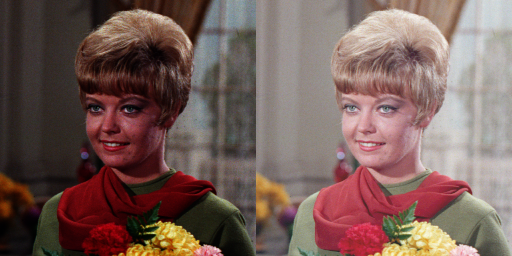

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Gamma Correction pada citra')
print('----------------------------------')

try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## Soal no - 2

2. Buat Simulasi Image Depth

  Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.
  
  Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.


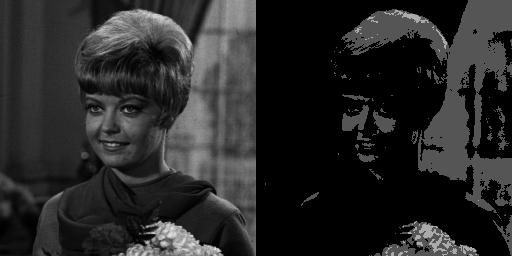

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv2.imread('/content/drive/MyDrive/Images/female.tiff', cv2.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        pixel_value = original[i, j]
        depth_value = int(pixel_value / level)
        depth_image[i, j] = depth_value * level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)


## Soal no - 3

3. Buat modul Average Denoising

  Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.

  Citra asli sudah disediakan pada /images/galaxy.jpg.

  100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg

  Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).


> Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut menggunakan cv_img[0], cv_img[1], dst.

> Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan anda:

### Jumlah Citra di Average - 5

Nilai PSNR adalah 27.54254546109201 (dB)


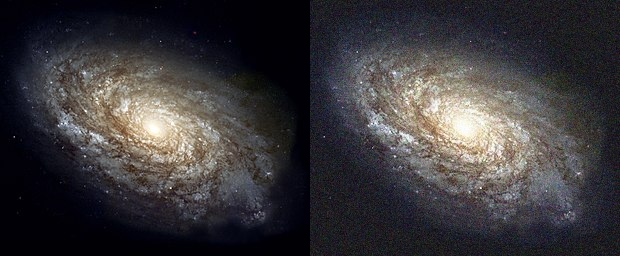

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average - 30

Nilai PSNR adalah 27.517826140325443 (dB)


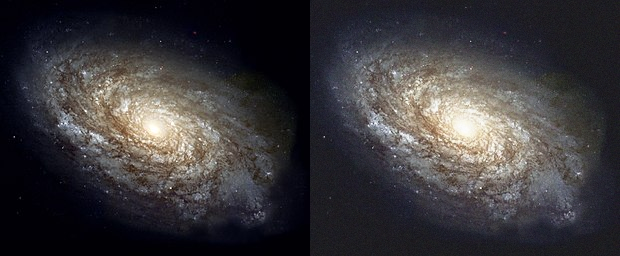

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average - 60

Nilai PSNR adalah 27.492818633210227 (dB)


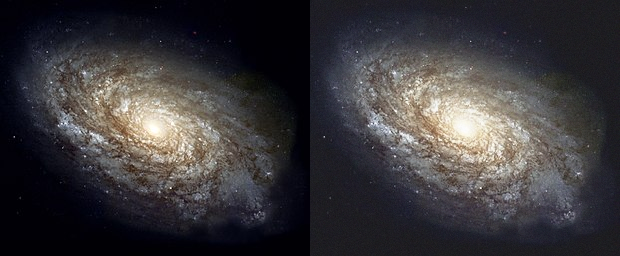

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average - 80

Nilai PSNR adalah 27.511811464971466 (dB)


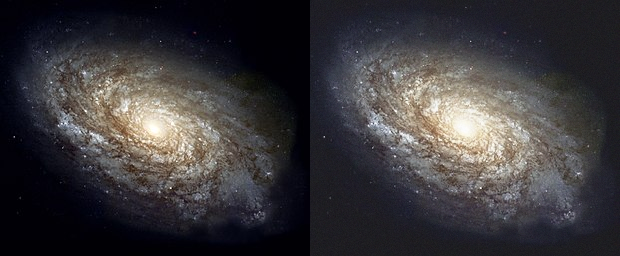

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average - 100

Nilai PSNR adalah 27.514711310402205 (dB)


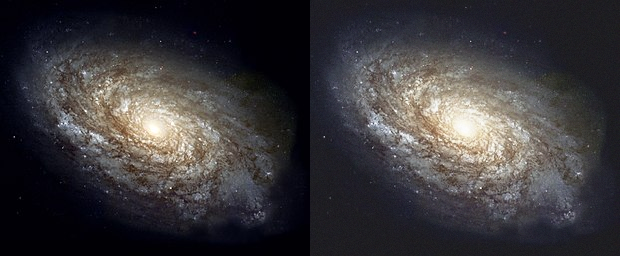

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

> Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.

### Kesimpulan

Kesimpulan yang dapat diambil yaitu akan bergantung pada hasil PSNR yang didapatkan dari berbagai citra dengan Gaussian Noise. Lebih tinggi PSNR akan menunjukkan bahwa metode denoising yang digunakan lebih efektif dalam memulihkan citra asli dari efek Gaussian Noise. Jika Anda ingin menggambarkan hasil lebih detail, Anda dapat melakukan analisis statistik atau visualisasi tambahan. berdasarkan hasil PSNR yang telah dihitung. PSNR yang lebih tinggi menunjukkan kualitas restorasi yang lebih baik setelah denoising.

## Soal no - 4

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya

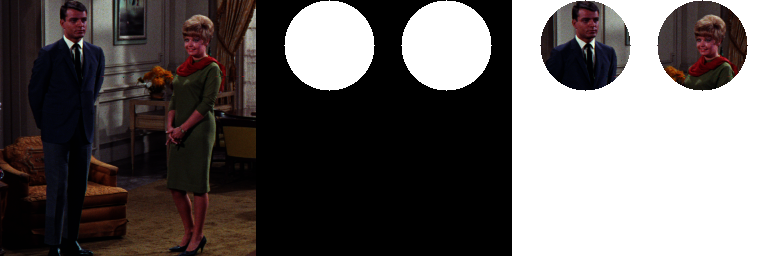

In [ ]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/Images/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (73, 45)  # (x, y) coordinates of the center of the first circle
radius1 = 45

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (190, 45)  # (x, y) coordinates of the center of the second circle
radius2 = 45

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

result = original_image & mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

result[mask==0] = 255
org_frame = cv.hconcat((original_image, mask, result))
cv2_imshow(org_frame)

## Soal no - 5

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

### Operator OR

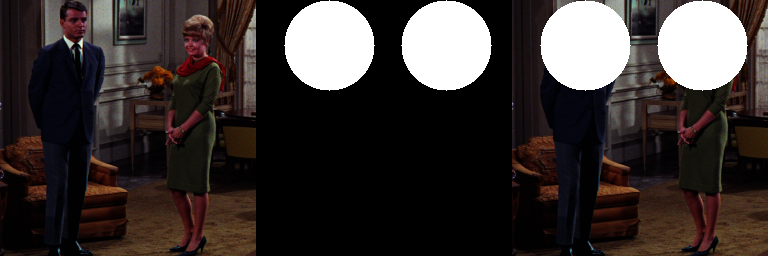

In [ ]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/Images/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (73, 45)  # (x, y) coordinates of the center of the first circle
radius1 = 45

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (190, 45)  # (x, y) coordinates of the center of the second circle
radius2 = 45

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

result = original_image | mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((original_image, mask, result))
cv2_imshow(org_frame)

### Operator NOT

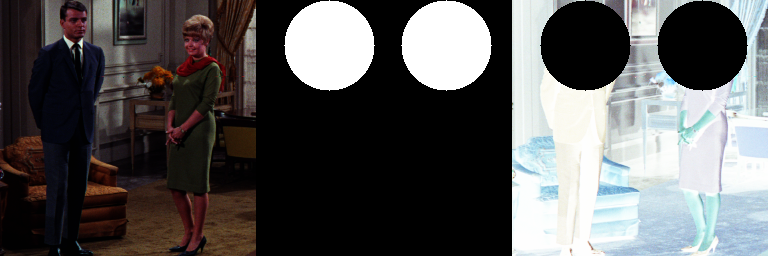

In [ ]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/Images/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (73, 45)  # (x, y) coordinates of the center of the first circle
radius1 = 45

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (190, 45)  # (x, y) coordinates of the center of the second circle
radius2 = 45

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

result = ~original_image & ~mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((original_image, mask, result))
cv2_imshow(org_frame)

### Operator NAND

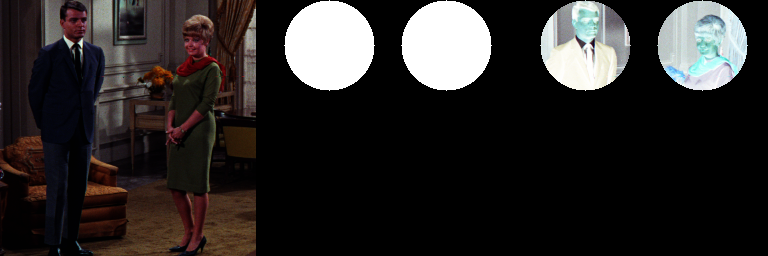

In [ ]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/Images/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (73, 45)  # (x, y) coordinates of the center of the first circle
radius1 = 45

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (190, 45)  # (x, y) coordinates of the center of the second circle
radius2 = 45

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

result = ~original_image & mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((original_image, mask, result))
cv2_imshow(org_frame)

### Operator XOR

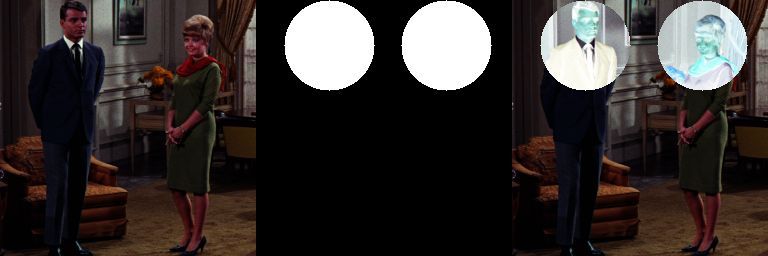

In [ ]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/Images/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (73, 45)  # (x, y) coordinates of the center of the first circle
radius1 = 45

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (190, 45)  # (x, y) coordinates of the center of the second circle
radius2 = 45

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

result = cv.bitwise_xor(original_image, mask)

org_frame = cv.hconcat((original_image, mask, result))
cv2_imshow(org_frame)

> Tuliskan hasil analisa anda:

### Hasil Analisa

image masking adalah teknik yang sangat berguna dalam pengolahan citra untuk mengisolasi objek atau area tertentu dalam citra. Ini memiliki banyak aplikasi dalam berbagai bidang dan memungkinkan untuk menghasilkan citra yang lebih fokus dan menarik serta digunakan dalam analisis dan pengembangan konten visual. Operasi OR menghasilkan citra yang menggabungkan dua citra input. Operasi NOT menghasilkan citra yang merupakan negasi dari citra input. Operasi NAND menghasilkan citra yang merupakan kebalikan dari hasil operasi AND pada citra input. Dan Operasi XOR menghasilkan citra yang menunjukkan perbedaan antara kedua citra input.